<a href="https://colab.research.google.com/github/sushantkumar402/Celsius-to-Fahrenheit-using-ANN/blob/master/Develop_A_Single_Neural_Model_to_convert_Celsius_to_Fahrenheit_using_ANN_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP#0: Import Libraries

In [ ]:
#!pip install tensorflow-gpu==2.0.0.alpha0

In [ ]:
# Installing compatible tensorflow 
!pip install tensorflow
try:
  %tensorflow_version 1.x
except Exception:
  pass

TensorFlow 1.x selected.


In [ ]:
#Importing required libraries for data processing and visualization

import tensorflow as tf
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## STEP #1: Import *Dataset*

In [ ]:
#Mouting colab with the drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Importing dataset from drive

temp_df = pd.read_csv('/content/drive/My Drive/ML_Dataset/Celsius to Fahrenheit/Celsius to Fahrenheit.csv')

In [ ]:
temp_df.head() #showing top rows

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [ ]:
temp_df.tail(10) #last 10 rows of the dataset     

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [ ]:
temp_df.describe() #description about dataset

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


`## STEP #2: Visualization of Dataset`

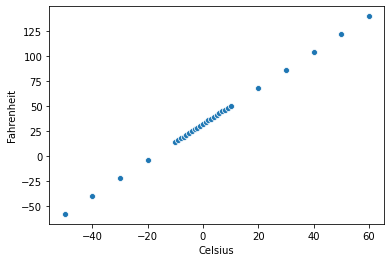

In [ ]:
sns.scatterplot(temp_df['Celsius'], temp_df['Fahrenheit'])

## STEP #3: Creating Training & Testing Dataset

In [ ]:
X_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

## STEP #4: Build & Train the Model

In [ ]:
X_train.shape

(30,)

In [ ]:
y_train.shape

(30,)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units= 1 , input_shape = [1]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(1), loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=500)

Train on 30 samples
Epoch 1/500
30/30 [==============================] - 10s 324ms/sample - loss: 5195.8613
Epoch 2/500
30/30 [==============================] - 0s 162us/sample - loss: 2723.7844
Epoch 3/500
30/30 [==============================] - 0s 152us/sample - loss: 1302.2950
Epoch 4/500
30/30 [==============================] - 0s 120us/sample - loss: 835.0548
Epoch 5/500
30/30 [==============================] - 0s 124us/sample - loss: 1042.1108
Epoch 6/500
30/30 [==============================] - 0s 132us/sample - loss: 1476.3607
Epoch 7/500
30/30 [==============================] - 0s 125us/sample - loss: 1750.0665
Epoch 8/500
30/30 [==============================] - 0s 55us/sample - loss: 1724.2411
Epoch 9/500
30/30 [==============================] - 0s 127us/sample - loss: 1459.0183
Epoch 10/500
30/30 [==============================] - 0s 122us/sample - loss: 1088.3253
Epoch 11/500
30/30 [==============================] - 0s 66us/sample - loss: 741.3525
Epoch 12/500
30/30 [====

## STEP #5: Evaluating the Model

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

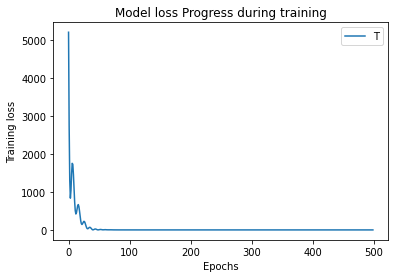

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss Progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend('Training loss')
plt.show()

In [ ]:
model.get_weights()

[array([[1.8000001]], dtype=float32), array([32.], dtype=float32)]

In [ ]:
# Use the same model to perform predictions
Temp_C = -32
Temp_F = model.predict([Temp_C])
print('Temprature in Fahrenheit using simple ANN=', Temp_F)

Temprature in Fahrenheit using simple ANN= [[-25.600002]]


In [ ]:
# Lets confirm with the equation
Temp_F = 9/5 * Temp_C + 32
print('Temprature in Fahrenheit using normal equation=', Temp_F)

Temprature in Fahrenheit using normal equation= -25.6
